1b. Code Implementation for Integrating MySQL with Python
---

In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import plotly.express as px
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier
from matplotlib import pyplot as plt
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn import metrics


In [2]:
# !pip install sqlalchemy

# Uncomment above and run cell to install package for the first time

In [3]:
query = """
    SELECT * FROM churn_status;
"""

In [4]:
import pandas as pd
from sqlalchemy import create_engine

ENDPOINT = 'heicoders-playground.c2ced10ceyki.ap-southeast-1.rds.amazonaws.com'
PORT = 3306
USERNAME = 'student300'
PASSWORD = 'heicoders_AI300'
DBNAME = 'ai300_capstone'

database_conn = create_engine(f'mysql+pymysql://{USERNAME}:{PASSWORD}@{ENDPOINT}/{DBNAME}')

df = pd.read_sql(query, database_conn)
df

,customer_id,status,churn_label,churn_category,churn_reason
0,0002-ORFBO,Stayed,No,,
1,0003-MKNFE,Stayed,No,,
2,0004-TLHLJ,Churned,Yes,Competitor,Competitor had better devices
3,0011-IGKFF,Churned,Yes,Dissatisfaction,Product dissatisfaction
4,0013-EXCHZ,Churned,Yes,Dissatisfaction,Network reliability
...,...,...,...,...,...
7038,9987-LUTYD,Stayed,No,,
7039,9992-RRAMN,Churned,Yes,Dissatisfaction,Product dissatisfaction
7040,9992-UJOEL,Joined,No,,
7041,9993-LHIEB,Stayed,No,,


In [5]:
another_query = """
    SELECT cs.customer_id, cs.churn_label, id.*, acc.*, ac_use.*,c.*
FROM churn_status AS cs
LEFT JOIN customer AS id
ON cs.customer_id = id.customer_id
LEFT JOIN account AS acc
ON cs.customer_id = acc.customer_id
LEFT JOIN account_usage AS ac_use
ON acc.account_id = ac_use.account_id
LEFT JOIN city AS c
ON id.zip_code = c.zip_code
WHERE churn_label IN ('Yes','No');
"""
df = pd.read_sql(another_query, database_conn)
df

,customer_id,churn_label,customer_id,gender,age,senior_citizen,married,num_dependents,zip_code,account_id,...,stream_music,total_monthly_fee,total_charges_quarter,total_refunds,area_id,zip_code,city,latitutde,longitude,population
0,0013-EXCHZ,Yes,0013-EXCHZ,Female,75,Yes,Yes,0,93010,BFIN-DLMOA,...,No,83.90,267.40,0.00,607,93010,Camarillo,34.227846,-119.079903,42853
1,0014-BMAQU,No,0014-BMAQU,Male,52,No,Yes,0,94558,AFEO-XOOCP,...,No,84.65,5377.80,0.00,963,94558,Napa,38.489789,-122.270110,63947
2,0016-QLJIS,No,0016-QLJIS,Female,43,No,Yes,1,95681,DEMQ-MFXWC,...,Yes,90.45,5957.90,0.00,1390,95681,Sheridan,38.984756,-121.345074,1219
3,0019-EFAEP,No,0019-EFAEP,Female,32,No,No,0,91942,AIPP-VTDXJ,...,No,101.30,7261.25,0.00,303,91942,La Mesa,32.782501,-117.016110,24005
4,0019-GFNTW,No,0019-GFNTW,Female,39,No,No,0,93441,CJHA-SRKIB,...,No,45.05,2560.10,0.00,716,93441,Los Olivos,34.704340,-120.026090,1317
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6986,9848-JQJTX,No,9848-JQJTX,Male,52,No,No,0,90291,ZTCJ-AYASC,...,Yes,100.90,7459.05,0.00,94,90291,Venice,33.991782,-118.479229,31021
6987,9921-ZVRHG,Yes,9921-ZVRHG,Female,44,No,No,0,93673,WKQW-QPWUM,...,No,80.45,1072.00,0.00,819,93673,Traver,36.456091,-119.486225,646
6988,9938-TKDGL,No,9938-TKDGL,Male,38,No,Yes,3,93544,VKPX-MVNBC,...,Yes,99.55,6668.00,0.00,755,93544,Llano,34.500091,-117.765862,1220
6989,9938-ZREHM,No,9938-ZREHM,Female,41,No,Yes,0,93033,PQGJ-VYMBE,...,Yes,72.10,2658.40,16.36,615,93033,Oxnard,34.156629,-119.117218,77791


In [6]:
# create a copy to modify
df_transformed = df.copy()

# dropping from df_transformed columns that are not critical to the ML model

# Assuming df is your DataFrame and columns_to_drop is a list of column names you want to drop
columns_to_drop = ['customer_id', 'zip_code', 'account_id']

# Drop the specified columns
df_transformed = df.drop(columns=columns_to_drop, axis='columns')
df_transformed.head()


,churn_label,gender,age,senior_citizen,married,num_dependents,tenure_months,num_referrals,has_internet_service,internet_type,...,stream_movie,stream_music,total_monthly_fee,total_charges_quarter,total_refunds,area_id,city,latitutde,longitude,population
0,Yes,Female,75,Yes,Yes,0,3,3,Yes,Fiber Optic,...,No,No,83.90,267.40,0.0,607,Camarillo,34.227846,-119.079903,42853
1,No,Male,52,No,Yes,0,63,8,Yes,Fiber Optic,...,No,No,84.65,5377.80,0.0,963,Napa,38.489789,-122.270110,63947
2,No,Female,43,No,Yes,1,65,3,Yes,Cable,...,Yes,Yes,90.45,5957.90,0.0,1390,Sheridan,38.984756,-121.345074,1219
3,No,Female,32,No,No,0,72,0,Yes,Fiber Optic,...,No,No,101.30,7261.25,0.0,303,La Mesa,32.782501,-117.016110,24005
4,No,Female,39,No,No,0,56,0,Yes,DSL,...,No,No,45.05,2560.10,0.0,716,Los Olivos,34.704340,-120.026090,1317


In [7]:
df_transformed.info()
df_transformed.dtypes.value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6991 entries, 0 to 6990
Data columns (total 34 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   churn_label                    6991 non-null   object 
 1   gender                         6991 non-null   object 
 2   age                            6991 non-null   int64  
 3   senior_citizen                 6991 non-null   object 
 4   married                        6991 non-null   object 
 5   num_dependents                 6991 non-null   int64  
 6   tenure_months                  6991 non-null   int64  
 7   num_referrals                  6991 non-null   int64  
 8   has_internet_service           6991 non-null   object 
 9   internet_type                  6991 non-null   object 
 10  has_unlimited_data             6991 non-null   object 
 11  has_phone_service              6991 non-null   object 
 12  has_multiple_lines             6991 non-null   o

object     20
int64       7
float64     7
Name: count, dtype: int64

In [8]:
# label encoding (binary variables)
label_encoding_columns = ['churn_label', 'gender', 'has_internet_service', 'has_unlimited_data', 'has_phone_service', 'has_multiple_lines', 'has_premium_tech_support','has_online_security', 'has_online_backup', 'has_device_protection', 'paperless_billing', 'stream_tv', 'stream_movie', 'stream_music', 'senior_citizen', 'married']

# encode categorical binary features using label encoding
for column in label_encoding_columns:
    if column == 'gender':
        df_transformed[column] = df_transformed[column].map({'Female': 1, 'Male': 0})
    else: 
        df_transformed[column] = df_transformed[column].map({'Yes': 1, 'No': 0}) 


In [9]:
# one-hot encoding (categorical variables with more than two levels)
one_hot_encoding_columns = ['internet_type', 'contract_type', 'payment_method']

# encode categorical variables with more than two levels using one-hot encoding
df_transformed = pd.get_dummies(df_transformed, columns = one_hot_encoding_columns)

In [10]:
# min-max normalization (numeric variables)
min_max_columns = ['tenure_months', 'total_monthly_fee', 'total_charges_quarter']

# scale numerical variables using min max scaler
for column in min_max_columns:
        # minimum value of the column
        min_column = df_transformed[column].min()
        # maximum value of the column
        max_column = df_transformed[column].max()
        # min max scaler
        df_transformed[column] = (df_transformed[column] - min_column) / (max_column - min_column)


In [11]:
df_transformed.head()

,churn_label,gender,age,senior_citizen,married,num_dependents,tenure_months,num_referrals,has_internet_service,has_unlimited_data,...,internet_type_Cable,internet_type_DSL,internet_type_Fiber Optic,internet_type_None,contract_type_Month-to-Month,contract_type_One Year,contract_type_Two Year,payment_method_Bank Withdrawal,payment_method_Credit Card,payment_method_Mailed Check
0,1,1,75,1,1,0,0.028169,3,1,1,...,False,False,True,False,True,False,False,False,True,False
1,0,0,52,0,1,0,0.873239,8,1,0,...,False,False,True,False,False,False,True,False,True,False
2,0,1,43,0,1,1,0.901408,3,1,1,...,True,False,False,False,False,False,True,False,True,False
3,0,1,32,0,0,0,1.000000,0,1,1,...,False,False,True,False,False,False,True,True,False,False
4,0,1,39,0,0,0,0.774648,0,1,1,...,False,True,False,False,False,False,True,True,False,False


In [12]:
# Add here the ML models tested

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
# Split the transformed data into features and target variable
X = df_transformed.drop(['churn_label', 'city'], axis=1)
y = df_transformed['churn_label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
# XGBoost
import xgboost as xgb

# Create an XGBoost model
model = xgb.XGBClassifier()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate the AUC score
auc_score = roc_auc_score(y_test, y_pred)
print("XGBoost AUC Score:", auc_score)


XGBoost AUC Score: 0.7955889534665314


In [14]:
# CatBoost
from catboost import CatBoostClassifier
# Create a CatBoost model
model = CatBoostClassifier()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate the AUC score
auc_score = roc_auc_score(y_test, y_pred)
print("CatBoost AUC Score:", auc_score)

Learning rate set to 0.021485
0:	learn: 0.6719472	total: 199ms	remaining: 3m 19s
1:	learn: 0.6524952	total: 225ms	remaining: 1m 52s
2:	learn: 0.6351978	total: 251ms	remaining: 1m 23s
3:	learn: 0.6187296	total: 273ms	remaining: 1m 8s
4:	learn: 0.6057046	total: 294ms	remaining: 58.4s
5:	learn: 0.5938745	total: 315ms	remaining: 52.2s
6:	learn: 0.5800152	total: 337ms	remaining: 47.9s
7:	learn: 0.5702657	total: 358ms	remaining: 44.4s
8:	learn: 0.5573708	total: 378ms	remaining: 41.6s
9:	learn: 0.5462713	total: 400ms	remaining: 39.6s
10:	learn: 0.5354441	total: 424ms	remaining: 38.2s
11:	learn: 0.5257574	total: 450ms	remaining: 37.1s
12:	learn: 0.5166945	total: 468ms	remaining: 35.5s
13:	learn: 0.5080036	total: 482ms	remaining: 33.9s
14:	learn: 0.4999621	total: 493ms	remaining: 32.4s
15:	learn: 0.4927734	total: 505ms	remaining: 31.1s
16:	learn: 0.4857809	total: 517ms	remaining: 29.9s
17:	learn: 0.4787336	total: 529ms	remaining: 28.9s
18:	learn: 0.4721029	total: 541ms	remaining: 27.9s
19:	lear

169:	learn: 0.3045812	total: 2.22s	remaining: 10.8s
170:	learn: 0.3043414	total: 2.23s	remaining: 10.8s
171:	learn: 0.3040157	total: 2.25s	remaining: 10.8s
172:	learn: 0.3037868	total: 2.26s	remaining: 10.8s
173:	learn: 0.3034042	total: 2.27s	remaining: 10.8s
174:	learn: 0.3032200	total: 2.28s	remaining: 10.8s
175:	learn: 0.3028548	total: 2.29s	remaining: 10.7s
176:	learn: 0.3025627	total: 2.31s	remaining: 10.7s
177:	learn: 0.3022385	total: 2.32s	remaining: 10.7s
178:	learn: 0.3020242	total: 2.33s	remaining: 10.7s
179:	learn: 0.3017165	total: 2.34s	remaining: 10.7s
180:	learn: 0.3014326	total: 2.35s	remaining: 10.6s
181:	learn: 0.3012215	total: 2.36s	remaining: 10.6s
182:	learn: 0.3009819	total: 2.38s	remaining: 10.6s
183:	learn: 0.3007685	total: 2.39s	remaining: 10.6s
184:	learn: 0.3005237	total: 2.4s	remaining: 10.6s
185:	learn: 0.3003236	total: 2.41s	remaining: 10.6s
186:	learn: 0.3001380	total: 2.42s	remaining: 10.5s
187:	learn: 0.2998350	total: 2.44s	remaining: 10.5s
188:	learn: 0

345:	learn: 0.2687328	total: 4.27s	remaining: 8.07s
346:	learn: 0.2685657	total: 4.28s	remaining: 8.05s
347:	learn: 0.2683992	total: 4.29s	remaining: 8.04s
348:	learn: 0.2682341	total: 4.3s	remaining: 8.03s
349:	learn: 0.2681048	total: 4.32s	remaining: 8.01s
350:	learn: 0.2678708	total: 4.33s	remaining: 8s
351:	learn: 0.2677431	total: 4.34s	remaining: 7.99s
352:	learn: 0.2675712	total: 4.35s	remaining: 7.97s
353:	learn: 0.2673889	total: 4.36s	remaining: 7.96s
354:	learn: 0.2672290	total: 4.37s	remaining: 7.94s
355:	learn: 0.2670194	total: 4.38s	remaining: 7.93s
356:	learn: 0.2668607	total: 4.39s	remaining: 7.92s
357:	learn: 0.2667105	total: 4.41s	remaining: 7.9s
358:	learn: 0.2665723	total: 4.42s	remaining: 7.89s
359:	learn: 0.2664596	total: 4.43s	remaining: 7.87s
360:	learn: 0.2662439	total: 4.44s	remaining: 7.86s
361:	learn: 0.2660945	total: 4.45s	remaining: 7.84s
362:	learn: 0.2659601	total: 4.46s	remaining: 7.83s
363:	learn: 0.2658039	total: 4.47s	remaining: 7.81s
364:	learn: 0.265

510:	learn: 0.2427317	total: 6.16s	remaining: 5.9s
511:	learn: 0.2426067	total: 6.17s	remaining: 5.89s
512:	learn: 0.2424572	total: 6.19s	remaining: 5.87s
513:	learn: 0.2423612	total: 6.2s	remaining: 5.86s
514:	learn: 0.2422172	total: 6.21s	remaining: 5.85s
515:	learn: 0.2421151	total: 6.22s	remaining: 5.84s
516:	learn: 0.2418846	total: 6.23s	remaining: 5.82s
517:	learn: 0.2416656	total: 6.25s	remaining: 5.81s
518:	learn: 0.2413687	total: 6.26s	remaining: 5.8s
519:	learn: 0.2412127	total: 6.27s	remaining: 5.79s
520:	learn: 0.2410587	total: 6.28s	remaining: 5.77s
521:	learn: 0.2409473	total: 6.29s	remaining: 5.76s
522:	learn: 0.2408416	total: 6.3s	remaining: 5.75s
523:	learn: 0.2407320	total: 6.32s	remaining: 5.74s
524:	learn: 0.2406153	total: 6.33s	remaining: 5.72s
525:	learn: 0.2404642	total: 6.34s	remaining: 5.71s
526:	learn: 0.2402947	total: 6.35s	remaining: 5.7s
527:	learn: 0.2402024	total: 6.36s	remaining: 5.69s
528:	learn: 0.2400956	total: 6.37s	remaining: 5.67s
529:	learn: 0.239

670:	learn: 0.2201698	total: 8.03s	remaining: 3.94s
671:	learn: 0.2200793	total: 8.04s	remaining: 3.92s
672:	learn: 0.2199019	total: 8.05s	remaining: 3.91s
673:	learn: 0.2197642	total: 8.06s	remaining: 3.9s
674:	learn: 0.2196626	total: 8.07s	remaining: 3.89s
675:	learn: 0.2194565	total: 8.09s	remaining: 3.88s
676:	learn: 0.2193469	total: 8.1s	remaining: 3.86s
677:	learn: 0.2192226	total: 8.11s	remaining: 3.85s
678:	learn: 0.2190609	total: 8.12s	remaining: 3.84s
679:	learn: 0.2189669	total: 8.13s	remaining: 3.83s
680:	learn: 0.2187913	total: 8.14s	remaining: 3.81s
681:	learn: 0.2186622	total: 8.15s	remaining: 3.8s
682:	learn: 0.2185373	total: 8.17s	remaining: 3.79s
683:	learn: 0.2184845	total: 8.18s	remaining: 3.78s
684:	learn: 0.2182719	total: 8.19s	remaining: 3.77s
685:	learn: 0.2181524	total: 8.2s	remaining: 3.75s
686:	learn: 0.2180324	total: 8.21s	remaining: 3.74s
687:	learn: 0.2179488	total: 8.22s	remaining: 3.73s
688:	learn: 0.2178954	total: 8.23s	remaining: 3.72s
689:	learn: 0.21

832:	learn: 0.2009596	total: 9.89s	remaining: 1.98s
833:	learn: 0.2008361	total: 9.9s	remaining: 1.97s
834:	learn: 0.2006581	total: 9.91s	remaining: 1.96s
835:	learn: 0.2005993	total: 9.92s	remaining: 1.95s
836:	learn: 0.2004612	total: 9.94s	remaining: 1.93s
837:	learn: 0.2004059	total: 9.95s	remaining: 1.92s
838:	learn: 0.2003209	total: 9.96s	remaining: 1.91s
839:	learn: 0.2002554	total: 9.97s	remaining: 1.9s
840:	learn: 0.2000882	total: 9.98s	remaining: 1.89s
841:	learn: 0.1999864	total: 10s	remaining: 1.88s
842:	learn: 0.1999115	total: 10s	remaining: 1.86s
843:	learn: 0.1998087	total: 10s	remaining: 1.85s
844:	learn: 0.1997024	total: 10s	remaining: 1.84s
845:	learn: 0.1995563	total: 10s	remaining: 1.83s
846:	learn: 0.1994635	total: 10.1s	remaining: 1.81s
847:	learn: 0.1993630	total: 10.1s	remaining: 1.8s
848:	learn: 0.1993003	total: 10.1s	remaining: 1.79s
849:	learn: 0.1991720	total: 10.1s	remaining: 1.78s
850:	learn: 0.1990572	total: 10.1s	remaining: 1.77s
851:	learn: 0.1989621	tot

993:	learn: 0.1834479	total: 11.7s	remaining: 70.9ms
994:	learn: 0.1833221	total: 11.8s	remaining: 59.1ms
995:	learn: 0.1832372	total: 11.8s	remaining: 47.3ms
996:	learn: 0.1831427	total: 11.8s	remaining: 35.5ms
997:	learn: 0.1830769	total: 11.8s	remaining: 23.7ms
998:	learn: 0.1830220	total: 11.8s	remaining: 11.8ms
999:	learn: 0.1829184	total: 11.8s	remaining: 0us
CatBoost AUC Score: 0.8247481740269079


In [15]:
# LightGBM
import lightgbm as lgb

# Create a LightGBM dataset
train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_test, label=y_test)

# Set the parameters for the model
params = {
    'objective': 'binary',
    'metric': 'auc'
}

# Train the model
model = lgb.train(params, train_data, valid_sets=[test_data])

# Make predictions
y_pred = model.predict(X_test)

# Calculate the AUC score
auc_score = roc_auc_score(y_test, y_pred)
print("LightGBM AUC Score:", auc_score)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1459, number of negative: 4133
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001972 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2433
[LightGBM] [Info] Number of data points in the train set: 5592, number of used features: 39
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.260908 -> initscore=-1.041252
[LightGBM] [Info] Start training from score -1.041252
LightGBM AUC Score: 0.9278599756358035


In [ ]:
# Select the best performing model and input to estimators for RandomizedSearchCV

from sklearn.model_selection import RandomizedSearchCV

# define the parameter grid
grid_parameters = {'n_estimators': [80, 90, 100, 110, 115, 120],
                   'max_depth': [3, 4, 5, 6],
                   'max_features': [None, 'auto', 'sqrt', 'log2'], 
                   'min_samples_split': [2, 3, 4, 5]}

lgb_model = lgb.LGBMClassifier()

# define the RandomizedSearchCV class for trying different parameter combinations
random_search = RandomizedSearchCV(estimator=lgb_model,
                                   param_distributions=grid_parameters,
                                   cv=5,
                                   n_iter=150,
                                   n_jobs=-1)

# fitting the model for random search 
random_search.fit(X_train, y_train)

# print best parameter after tuning
print(random_search.best_params_)

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# make the predictions
random_search_predictions = random_search.predict(X_test)

# construct the confusion matrix
confusionmatrix = confusion_matrix(y_test, random_search_predictions)

# visualize the confusion matrix
confusionmatrix

In [ ]:
# print classification report 
print(classification_report(y_test, random_search_predictions))

In [ ]:
# print the auc score of the model after hyparameter tuning 
roc_auc_score(y_test, random_search_predictions)

# 3.🔄 Feature Engineering
---

> **OVERALL GOAL:** 
> - Select and enhance relevant features through feature engineering to improve the model performance

CHURN_LABEL

In [ ]:
# We convert the churn_label to binary
# First we define the function
def change_churn_label(churn_label):
    if churn_label == 'Yes':
        return 1
    else:
        return 0

# Next we apply the function
train_df['churn_label'] = train_df['churn_label'].apply(change_churn_label)
df.head()

In [ ]:
GENDER

In [ ]:
# We convert the churn_label to binary
# First we define the function
def change_gender(gender):
    if gender == 'Female':
        return 'F'
    else:
        return 'M'

# Next we apply the function
train_df['gender'] = train_df['gender'].apply(change_gender)
train_df.head()

In [ ]:
train_df.columns

In [ ]:
# X = train_df.drop(columns='churn_label') # Drop the 'churn_label' column from df
X = train_df['Age'] 
y = train_df['churn_label']

<b> Train-Test Split</b></br>
We split the data to facilitate the evaluation of the model.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
# CatBoost

model = CatBoostClassifier(learning_rate=0.1, random_state=5)

In [ ]:
# Fit the model with the training data
# You can set optional param verbose=False if you find the logs too long
categorical_cols = ['age']

model.fit(X_train, y_train, cat_features=categorical_cols, verbose=False)

# Predict the target on the test dataset
y_predict = model.predict(X_test)
accuracy_test = metrics.accuracy_score(y_test, y_predict)
print('\nAccuracy_score on test dataset : ', accuracy_test)

# Feature Importance
sorted_idx = model.feature_importances_.argsort()
plt.figure(figsize=(10, 6))
plt.barh(X_train.columns[sorted_idx], model.feature_importances_[sorted_idx])
plt.xlabel("CatBoost Feature Importance")
plt.title("Feature Importance Scores")
plt.show()

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1398, number of negative: 4194
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001217 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2433
[LightGBM] [Info] Number of data points in the train set: 5592, number of used features: 39
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.250000 -> initscore=-1.098612
[LightGBM] [Info] Start training from score -1.098612

Accuracy score on test dataset: 0.8656182987848463
LightGBM AUC Score: 0.9278599756358035


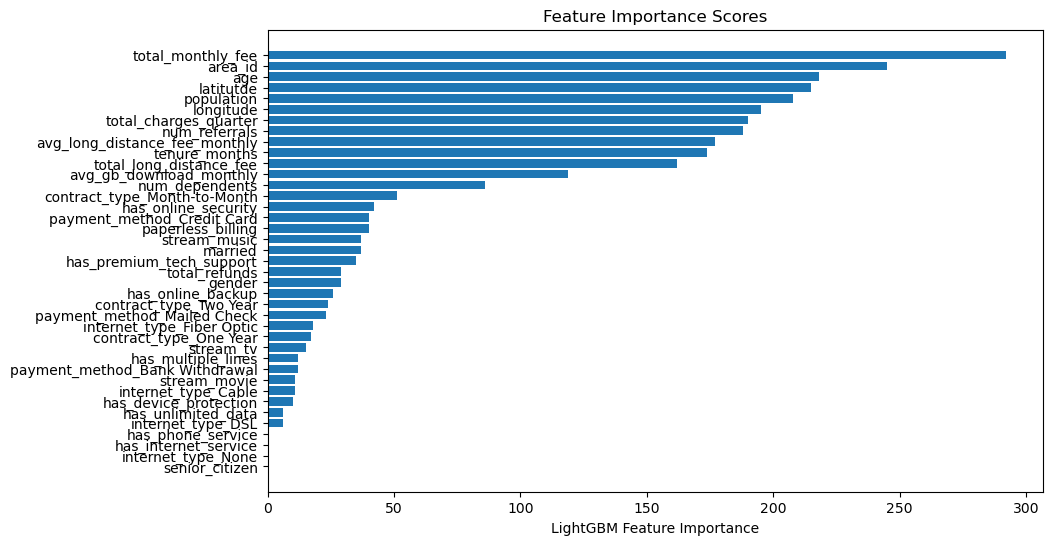

In [17]:
# LightGBM

# Initialize a LightGBM Classifier with 'auc' as the evaluation metric 
model = LGBMClassifier(metric='auc') 
  
# Fit the model on the training data 
model.fit(X_train, y_train) 
  
# Make predictions on the training and validation sets 
y_train = model.predict(X_train) 
y_val = model.predict(X_test) 

# Evaluate model performance
accuracy_test = metrics.accuracy_score(y_test, y_val)
print('\nAccuracy score on test dataset:', accuracy_test)

# Calculate the AUC score
auc_score = roc_auc_score(y_test, y_pred)
print("LightGBM AUC Score:", auc_score)

# Feature Importance
sorted_idx = model.feature_importances_.argsort()
plt.figure(figsize=(10, 6))
plt.barh(X_train.columns[sorted_idx], model.feature_importances_[sorted_idx])
plt.xlabel("LightGBM Feature Importance")
plt.title("Feature Importance Scores")
plt.show()
